# Sergio Perez
<img src="https://www.formula1.com/content/fom-website/en/drivers/sergio-perez/_jcr_content/image.img.1920.medium.jpg/1646819228700.jpg" width="300">

### Team: Red Bull Racing
<img src ="https://www.formula1.com/content/fom-website/en/drivers/sergio-perez/_jcr_content/helmet.img.png/1646824779194.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

per_laps <- lap_data %>%
            filter(driverId == 815)



# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
863,57
883,57
902,57
971,57
1011,57
929,56
949,56
990,56
1052,56


`geom_smooth()` using formula 'y ~ x'



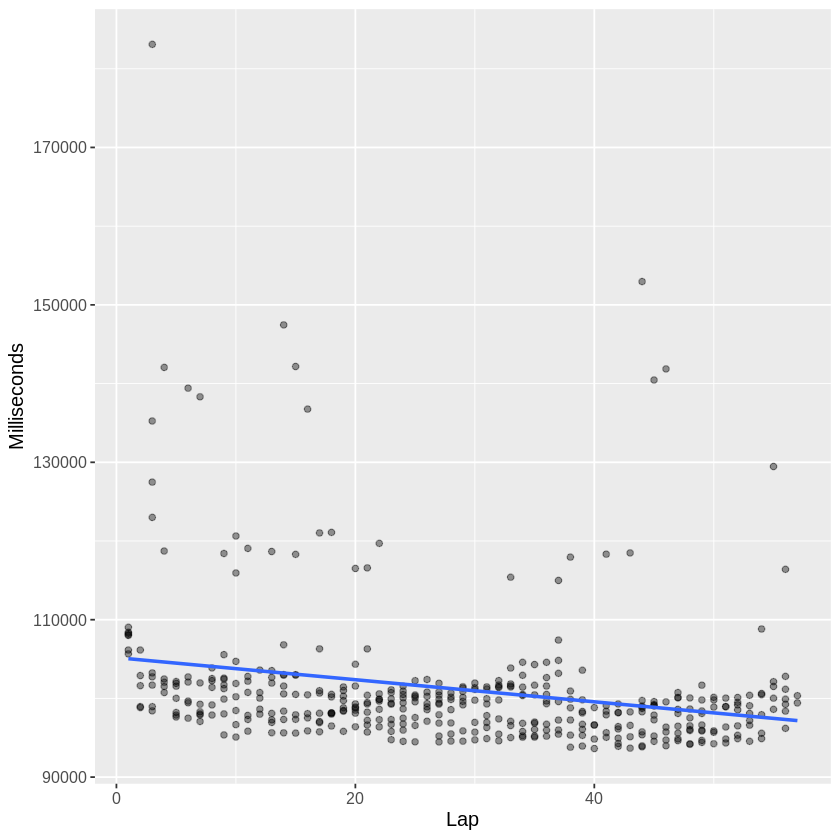

In [5]:
#1. Bahrain 

sp_bahrain <- per_laps %>%
                filter(raceId %in% bahrain_race_ID) 

sp_bahrain_clean <- sp_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sp_bahrain_clean
sp_bahrain_clean_ID <- sp_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_bahrain_races <- per_laps %>%
                    filter(raceId %in% sp_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



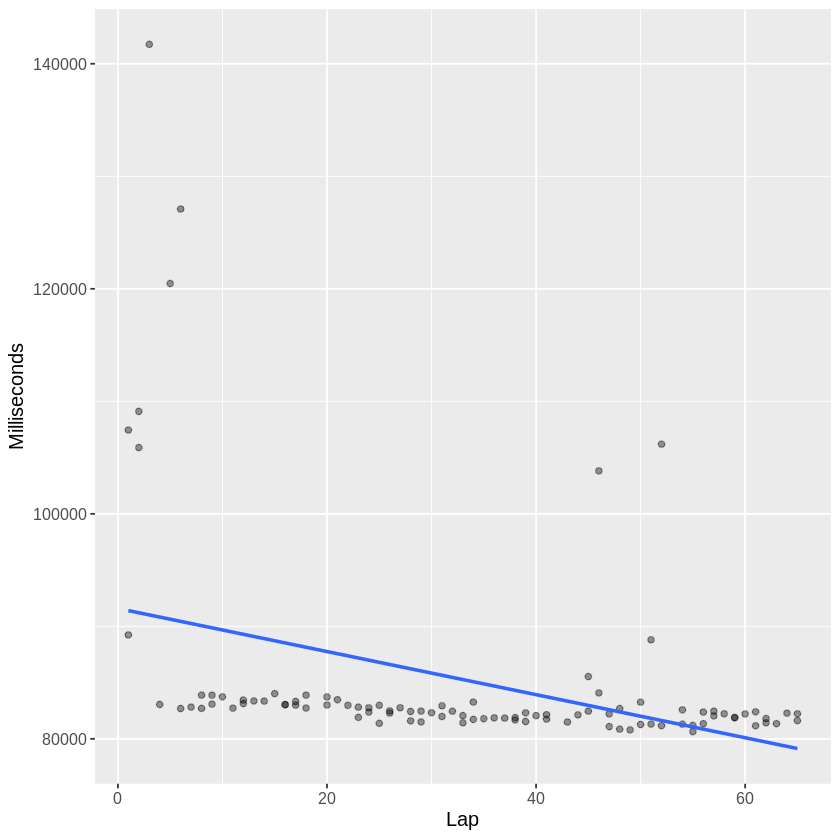

In [6]:
#2. Portimão

sp_Portimão <- per_laps %>%
                filter(raceId %in% Portimão_race_ID) 

sp_Portimão_clean <- sp_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_Portimão_clean
sp_Portimão_clean_ID <- sp_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_Portimão_races <- per_laps %>%
                    filter(raceId %in% sp_Portimão_clean_ID) 

formulaone_split <- initial_split(sp_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
841,58
860,58
880,58
989,58
900,57
926,57
948,57
1010,57
969,56


`geom_smooth()` using formula 'y ~ x'



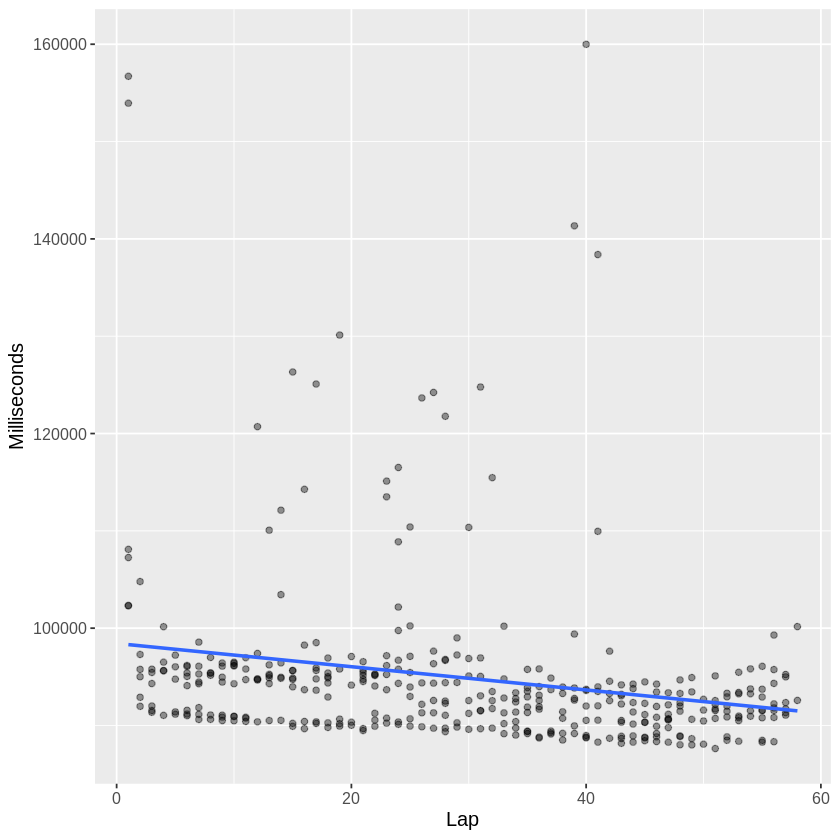

In [7]:
#3. Australia

sp_aus <- per_laps %>%
                filter(raceId %in% aus_race_ID) 

sp_aus_clean <- sp_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_aus_clean
sp_aus_clean_ID <- sp_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_aus_races <- per_laps %>%
                    filter(raceId %in% sp_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



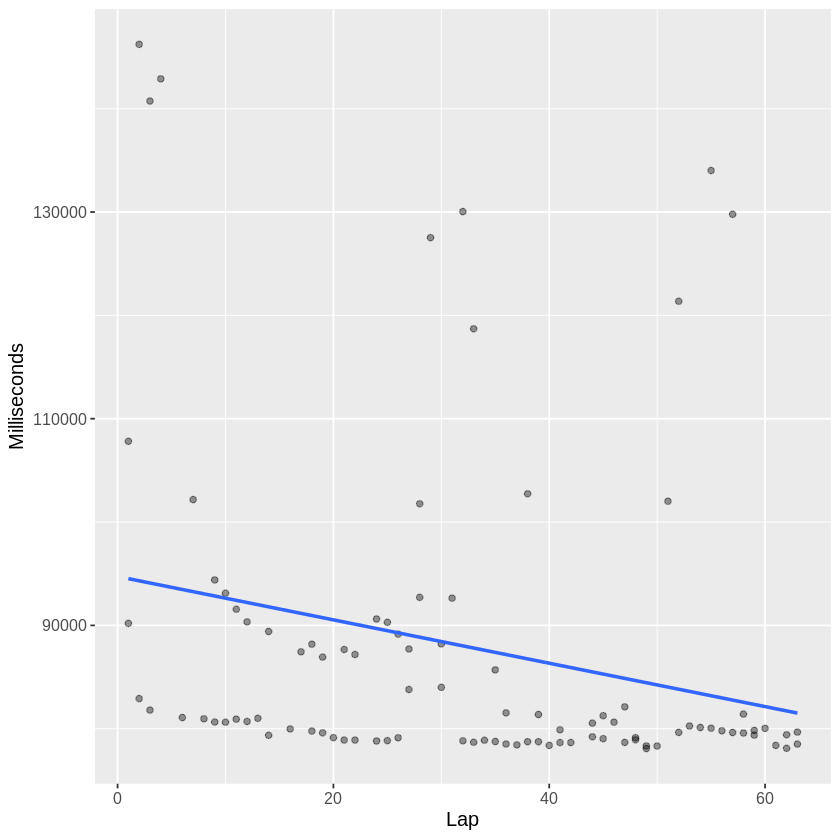

In [8]:
#4. Italy, Imola

sp_imola <- per_laps %>%
                filter(raceId %in% imola_race_ID) 

sp_imola_clean <- sp_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_imola_clean
sp_imola_clean_ID <- sp_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_imola_races <- per_laps %>%
                    filter(raceId %in% sp_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,58
844,57


`geom_smooth()` using formula 'y ~ x'



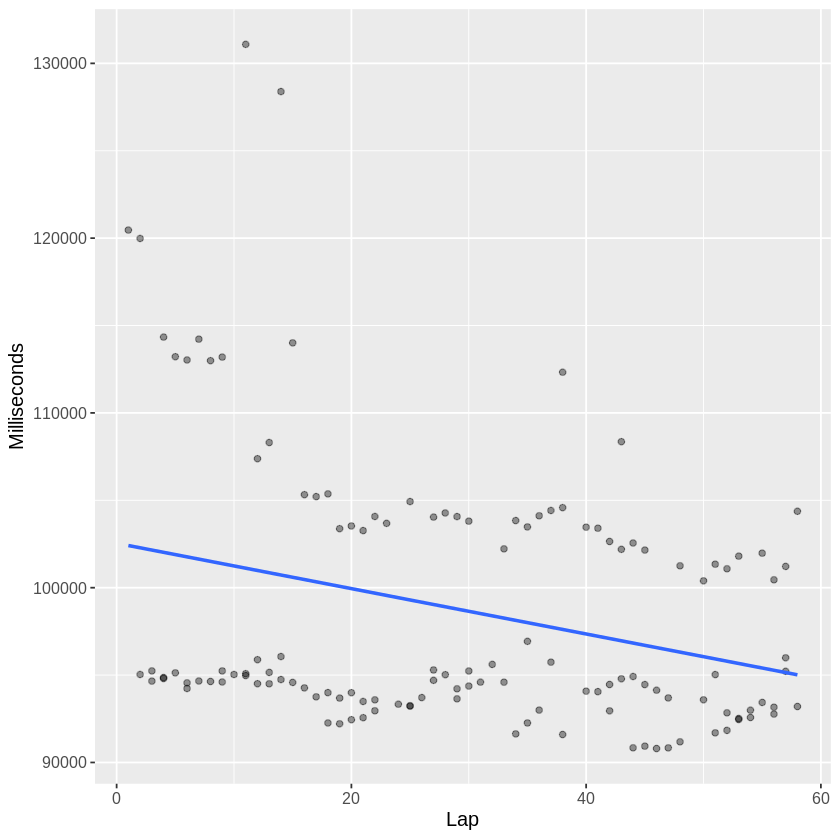

In [9]:
#5. Turkey (Replacing Miami)

sp_turkey <- per_laps %>%
                filter(raceId %in% turkey_race_ID) 

sp_turkey_clean <- sp_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_turkey_clean
sp_turkey_clean_ID <- sp_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_turkey_races <- per_laps %>%
                    filter(raceId %in% sp_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds))

formulaone_split <- initial_split(sp_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
884,66
952,66
1014,66
1055,66
845,65
904,65
930,65
973,65
1036,65


`geom_smooth()` using formula 'y ~ x'



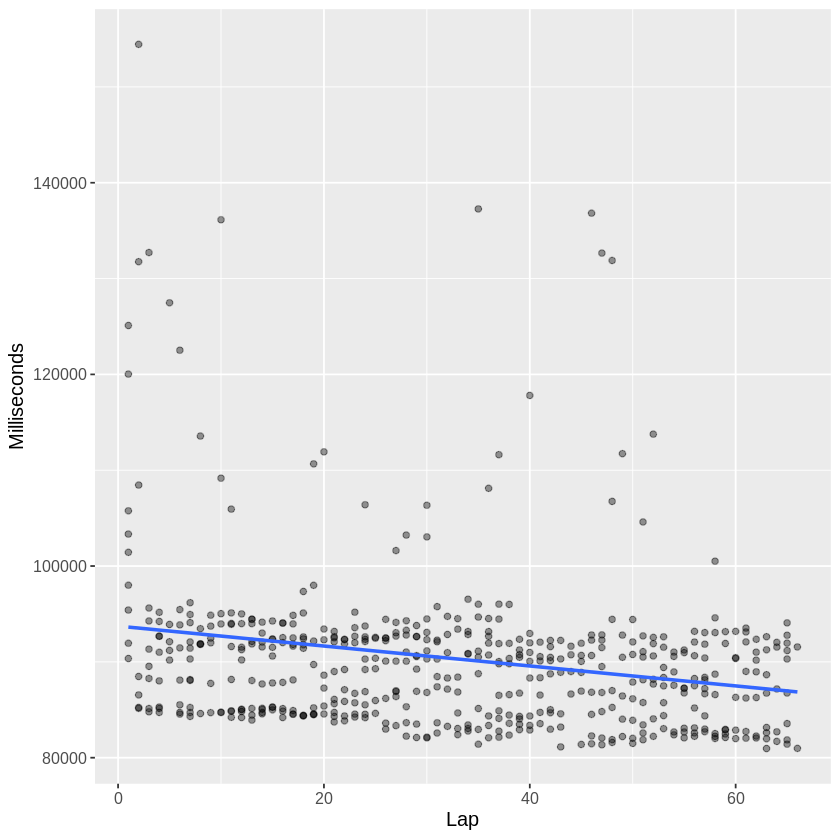

In [10]:
#6. Spain

sp_spain <- per_laps %>%
                filter(raceId %in% spain_race_ID) 

sp_spain_clean <- sp_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_spain_clean
sp_spain_clean_ID <- sp_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_spain_races <- per_laps %>%
                    filter(raceId %in% sp_spain_clean_ID)

formulaone_split <- initial_split(sp_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
931,78
953,78
974,78
994,78
1056,78
865,77
1015,77
885,72


`geom_smooth()` using formula 'y ~ x'



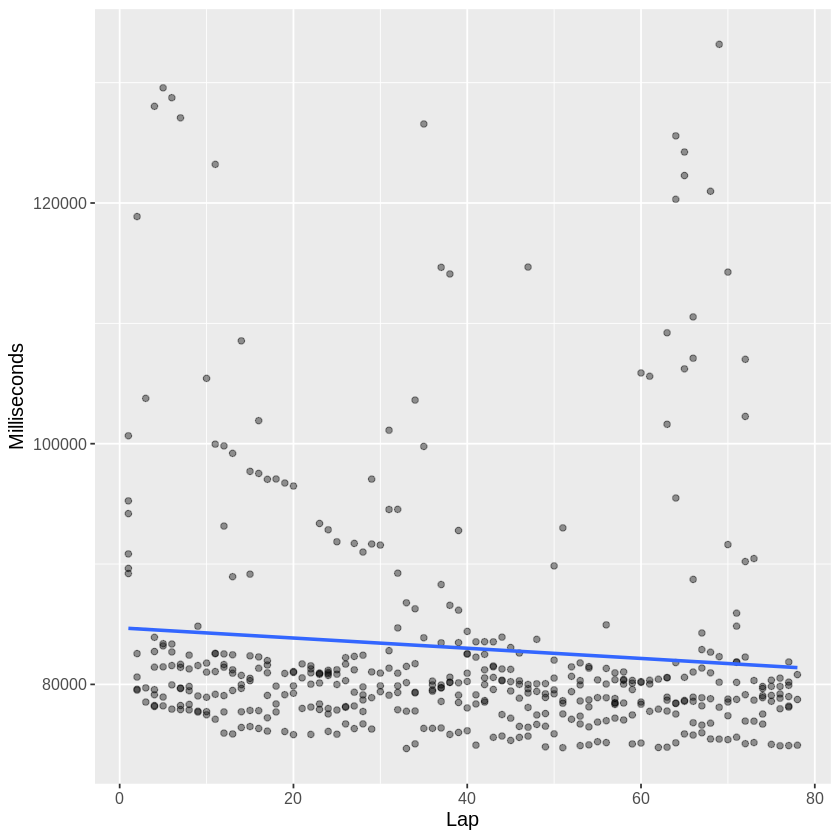

In [11]:
#7. Monaco

sp_monaco <- per_laps %>%
                filter(raceId %in% monaco_race_ID) 

sp_monaco_clean <- sp_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_monaco_clean
sp_monaco_clean_ID <- sp_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_monaco_races <- per_laps %>%
                    filter(raceId %in% sp_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
992,51
1013,51
1057,51
976,39


`geom_smooth()` using formula 'y ~ x'



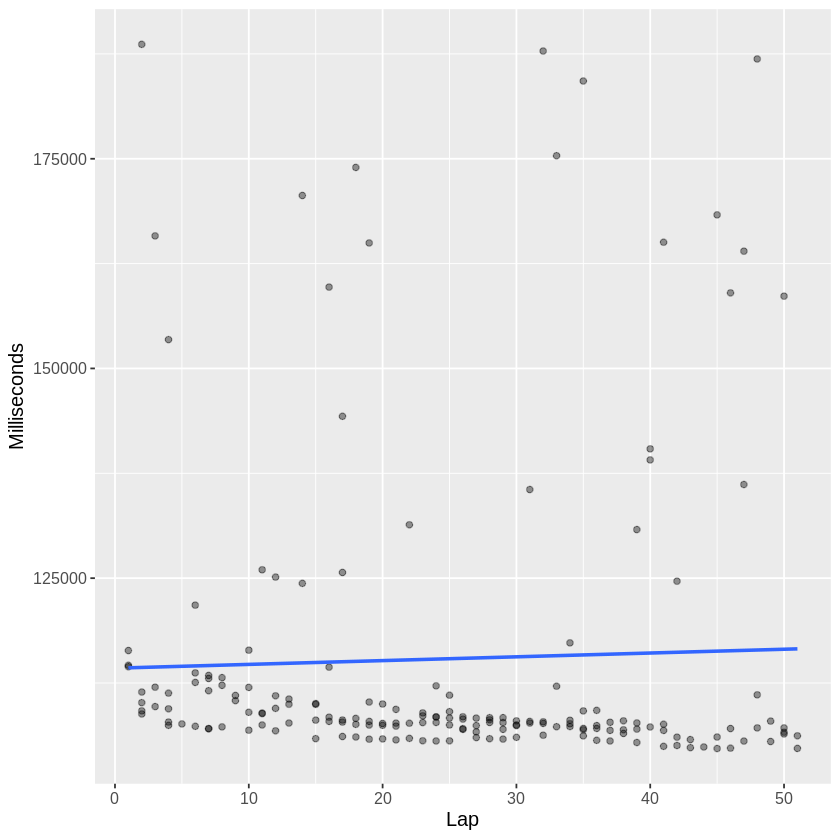

In [12]:
#8. Azerbaijan

sp_azerbaijan <- per_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

sp_azerbaijan_clean <- sp_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_azerbaijan_clean
sp_azerbaijan_clean_ID <- sp_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_azerbaijan_races <- per_laps %>%
                    filter(raceId %in% sp_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sp_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
866,70
975,70
886,69
906,69
932,69
954,69
1016,69
995,67


`geom_smooth()` using formula 'y ~ x'



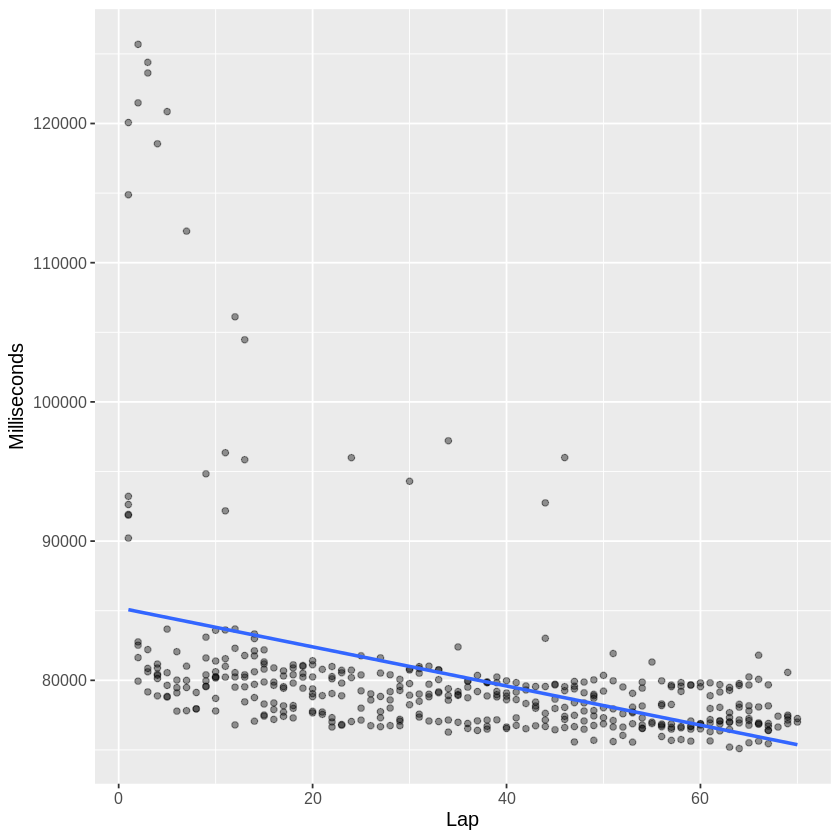

In [13]:
#9. Canada

sp_canada <- per_laps %>%
                filter(raceId %in% canada_race_ID) 

sp_canada_clean <- sp_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_canada_clean
sp_canada_clean_ID <- sp_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_canada_races <- per_laps %>%
                    filter(raceId %in% sp_canada_clean_ID)

formulaone_split <- initial_split(sp_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
849,52
957,52
998,52
908,51
934,51
1019,51
1061,51
978,50
887,46


`geom_smooth()` using formula 'y ~ x'



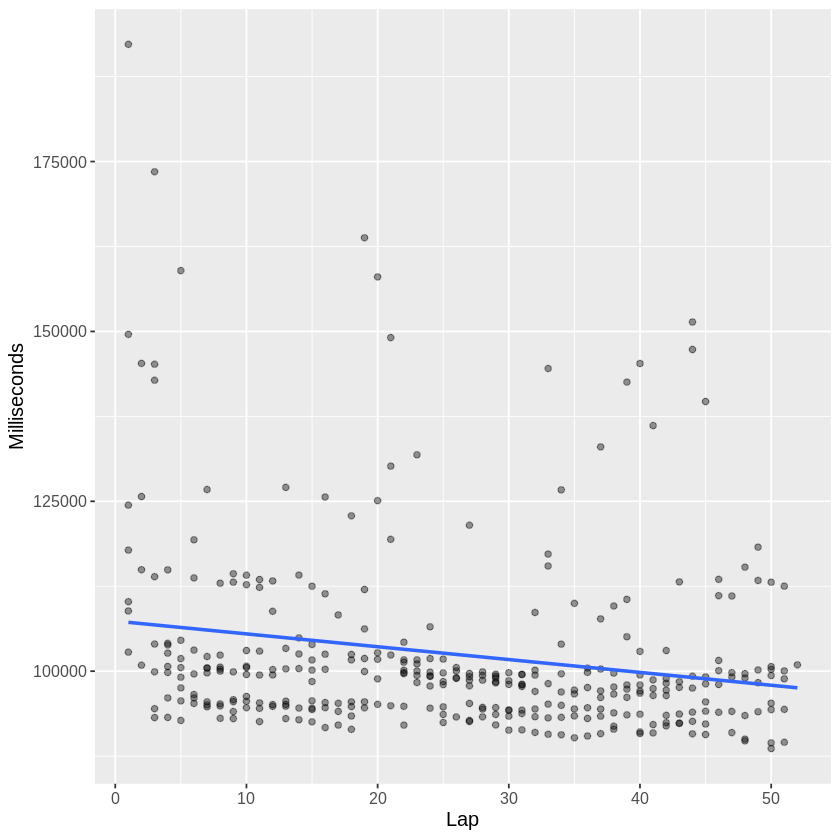

In [14]:
#10. Great Britain

sp_uk <- per_laps %>%
                filter(raceId %in% uk_race_ID) 

sp_uk_clean <- sp_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_uk_clean
sp_uk_clean_ID <- sp_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_uk_races <- per_laps %>%
                    filter(raceId %in% sp_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sp_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
907,71
1031,71
1032,71
1058,71
1060,71
933,70
977,70
997,70
1018,70


`geom_smooth()` using formula 'y ~ x'



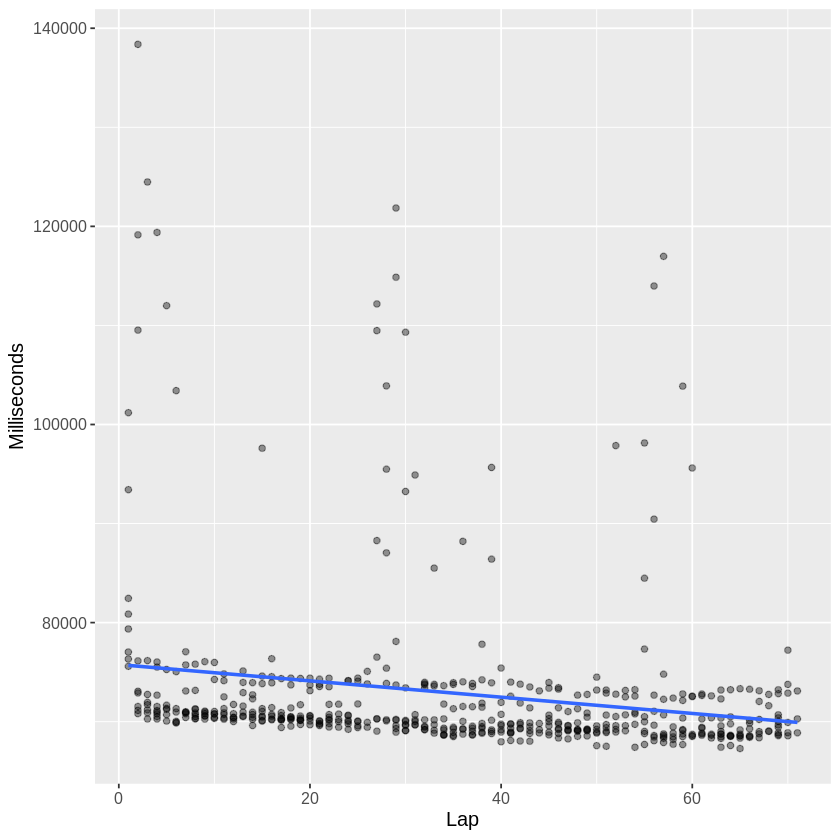

In [15]:
#11. Austria

sp_austria <- per_laps %>%
                filter(raceId %in% austria_race_ID) 

sp_austria_clean <- sp_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_austria_clean
sp_austria_clean_ID <- sp_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_austria_races <- per_laps %>%
                    filter(raceId %in% sp_austria_clean_ID)

formulaone_split <- initial_split(sp_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,53
1017,52
996,27


`geom_smooth()` using formula 'y ~ x'



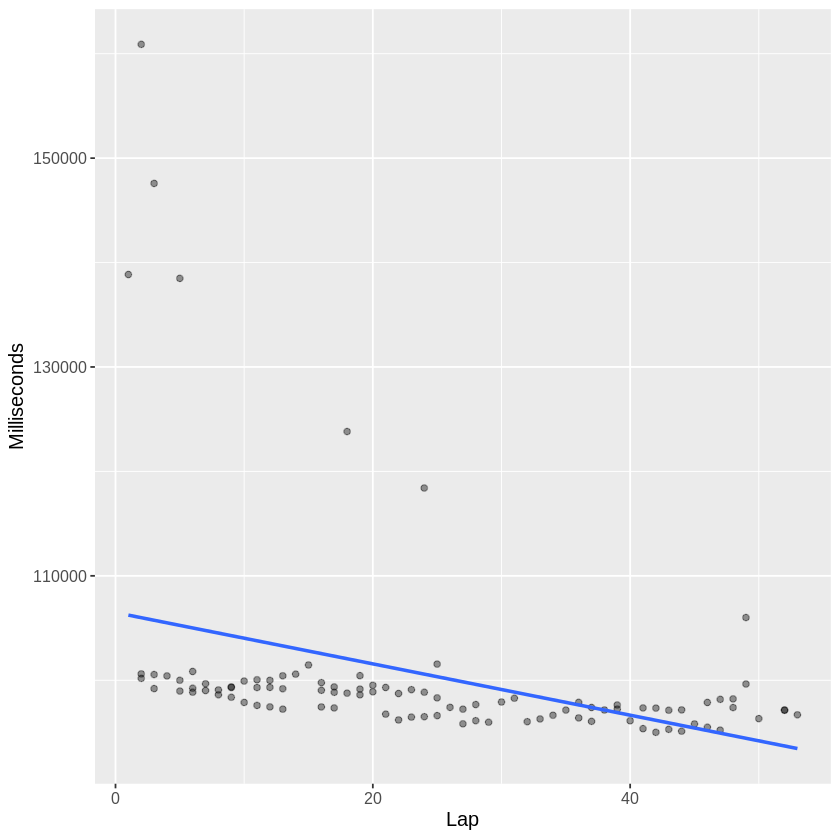

In [16]:
#12. France

sp_france <- per_laps %>%
                filter(raceId %in% france_race_ID) 

sp_france_clean <- sp_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_france_clean
sp_france_clean_ID <- sp_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_france_races <- per_laps %>%
                    filter(raceId %in% sp_france_clean_ID)

formulaone_split <- initial_split(sp_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
870,69
890,69
958,69
979,69
1000,69
1021,69
1033,69
851,68
936,53


`geom_smooth()` using formula 'y ~ x'



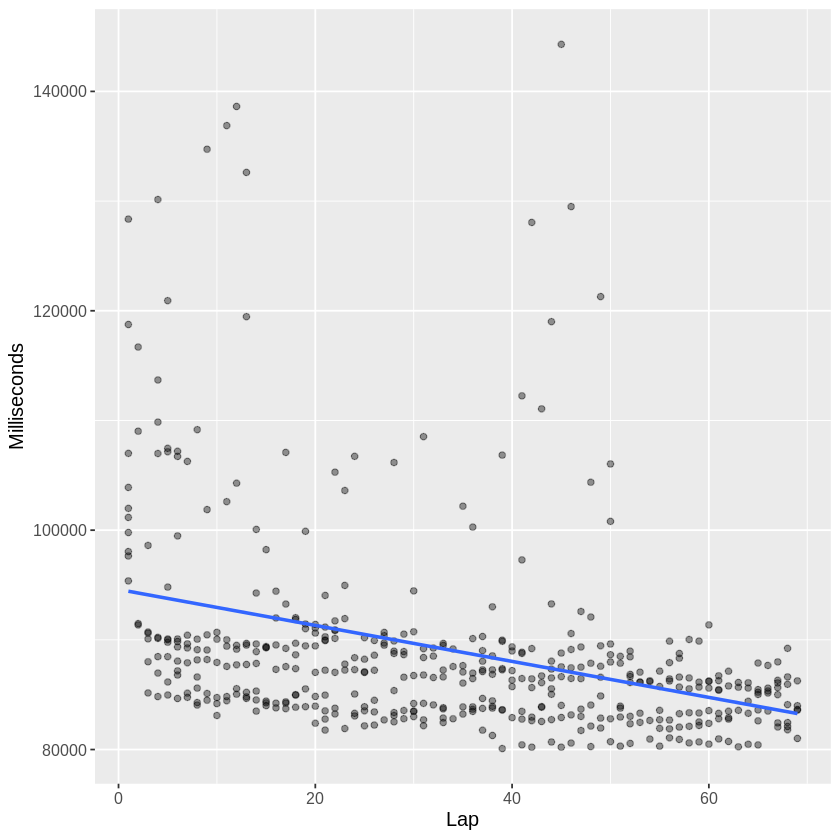

In [17]:
#13. Hungary

sp_hungary <- per_laps %>%
                filter(raceId %in% hungary_race_ID) 

sp_hungary_clean <- sp_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                     
sp_hungary_clean
sp_hungary_clean_ID <- sp_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_hungary_races <- per_laps %>%
                    filter(raceId %in% sp_hungary_clean_ID)

formulaone_split <- initial_split(sp_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
891,44
911,44
960,44
1001,44
1022,44
1037,44
937,43
980,42
852,27


`geom_smooth()` using formula 'y ~ x'



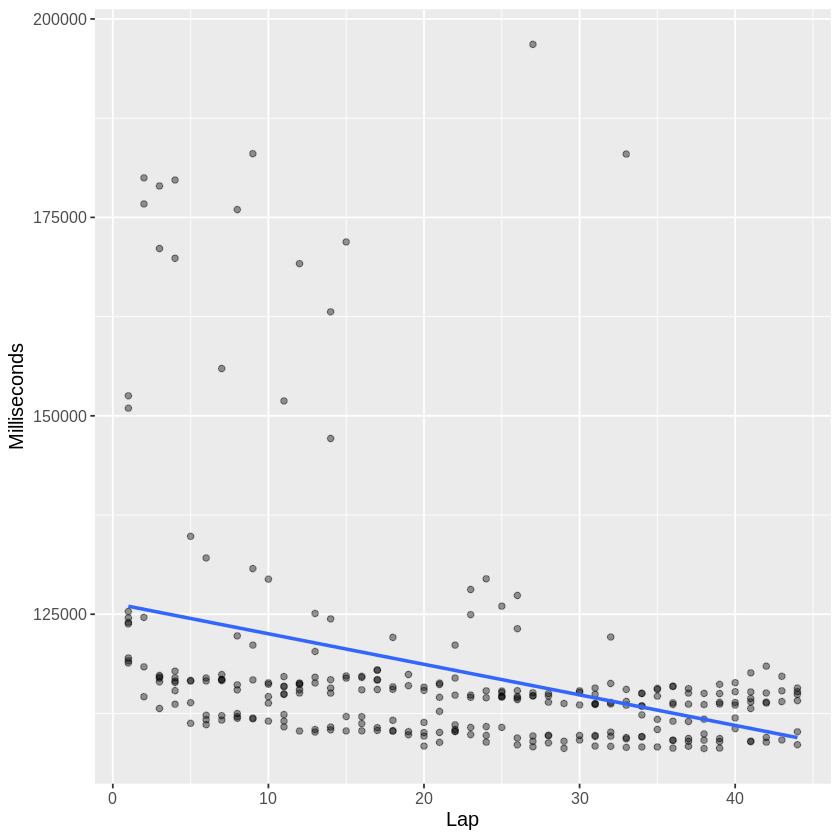

In [18]:
#14. Belgium

sp_belgium <- per_laps %>%
                filter(raceId %in% belgium_race_ID) 

sp_belgium_clean <- sp_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_belgium_clean
sp_belgium_clean_ID <- sp_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_belgium_races <- per_laps %>%
                    filter(raceId %in% sp_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



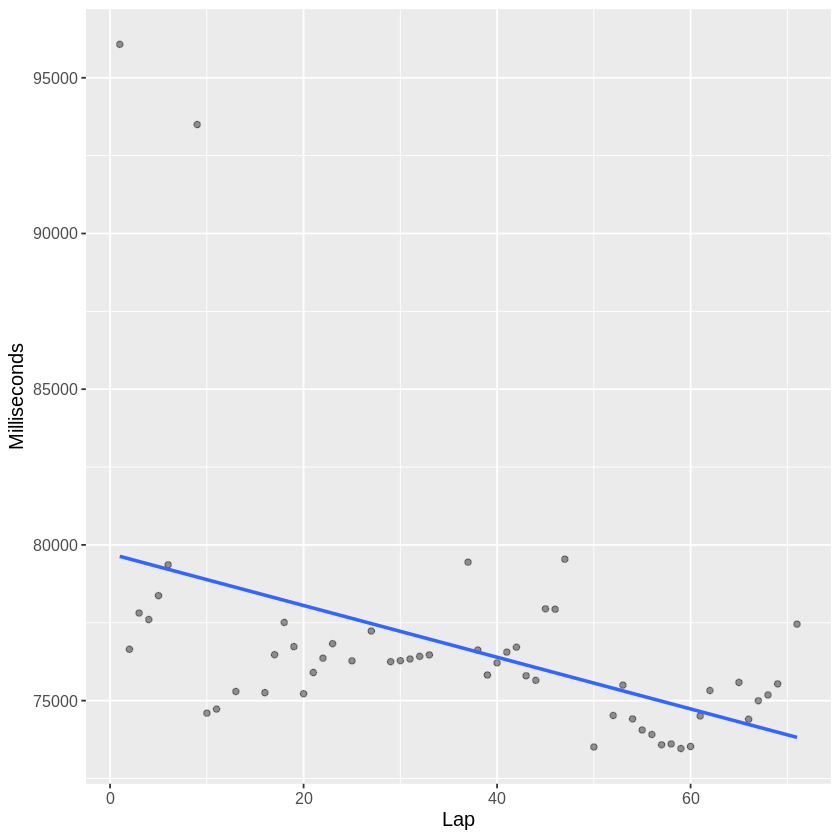

In [19]:
#15. Netherlands

sp_netherlands <- per_laps %>%
                filter(raceId %in% netherlands_race_ID) 

sp_netherlands_clean <- sp_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_netherlands_clean
sp_netherlands_clean_ID <- sp_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_netherlands_races <- per_laps %>%
                    filter(raceId %in% sp_netherlands_clean_ID)

formulaone_split <- initial_split(sp_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
872,53
892,53
912,53
938,53
961,53
981,53
1002,53
1023,53
1038,53


`geom_smooth()` using formula 'y ~ x'



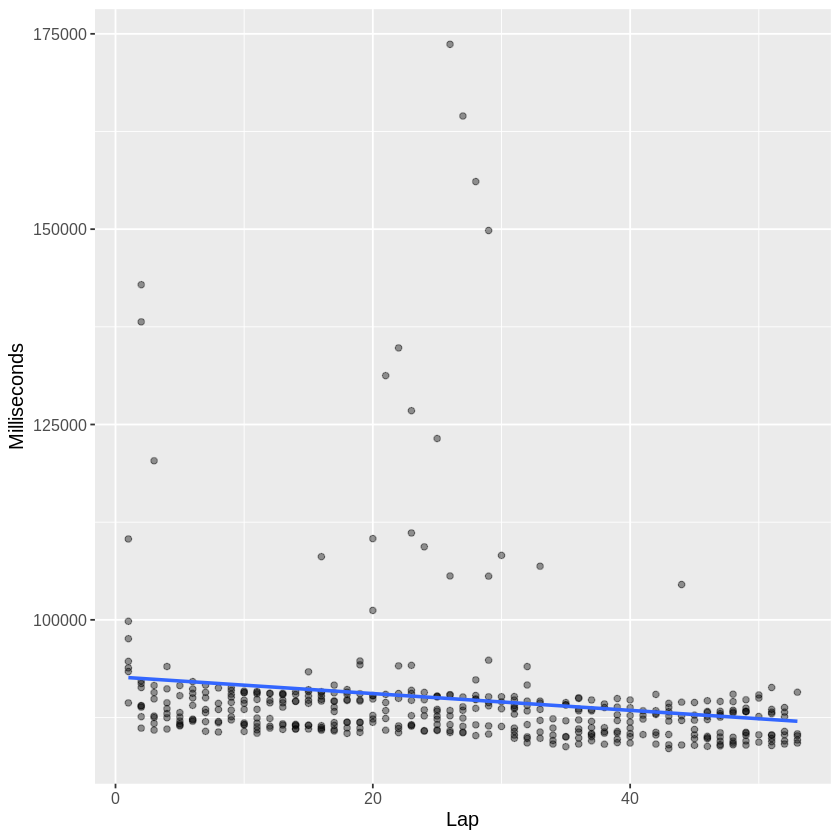

In [20]:
#16. Italy, Monza

sp_monza <- per_laps %>%
                filter(raceId %in% monza_race_ID) 

sp_monza_clean <- sp_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sp_monza_clean
sp_monza_clean_ID <- sp_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_monza_races <- per_laps %>%
                    filter(raceId %in% sp_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
893,61
939,61
962,61
854,60
913,60
1003,60
873,59
982,58
1024,42


`geom_smooth()` using formula 'y ~ x'



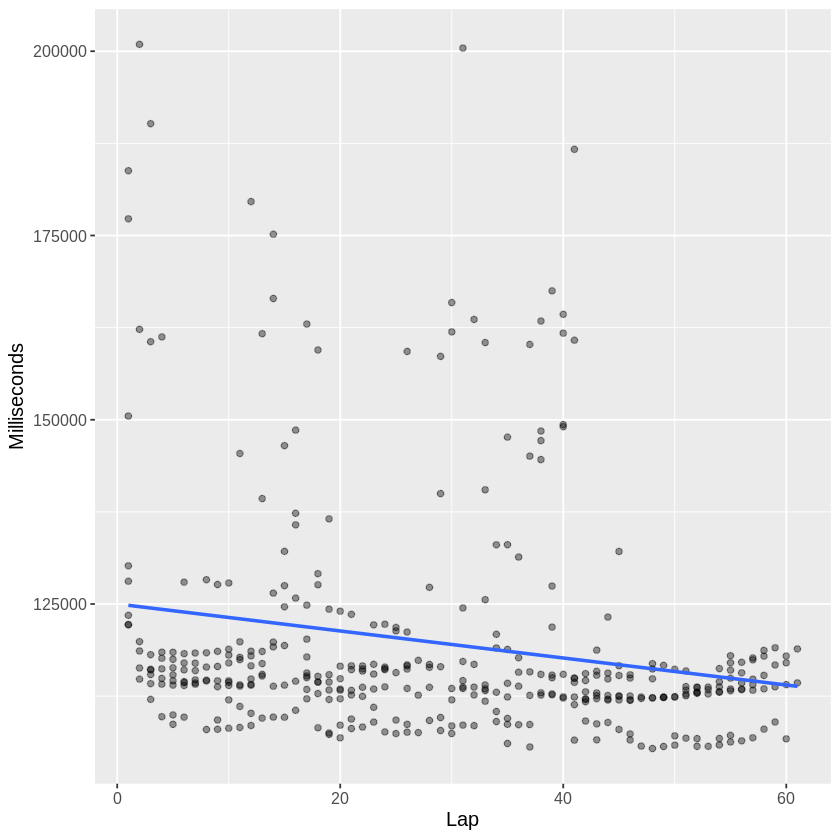

In [21]:
#17. Singapore

sp_singapore <- per_laps %>%
                filter(raceId %in% singapore_race_ID) 

sp_singapore_clean <- sp_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_singapore_clean
sp_singapore_clean_ID <- sp_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_singapore_races <- per_laps %>%
                    filter(raceId %in% sp_singapore_clean_ID)

formulaone_split <- initial_split(sp_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
855,53
964,53
984,53
1005,53
895,52
940,52
1026,51
914,43
874,18


`geom_smooth()` using formula 'y ~ x'



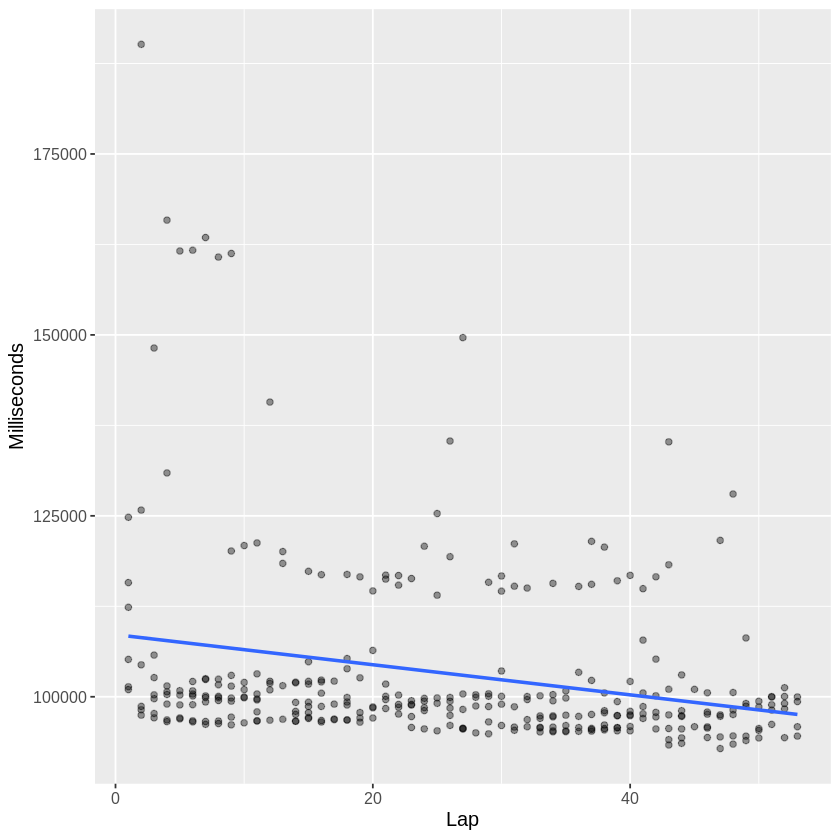

In [22]:
#18. Japan

sp_japan <- per_laps %>%
                filter(raceId %in% japan_race_ID) 

sp_japan_clean <- sp_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_japan_clean
sp_japan_clean_ID <- sp_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_japan_races <- per_laps %>%
                    filter(raceId %in% sp_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sp_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
878,56
898,56
942,56
1006,56
1069,56
965,55
985,55
1028,55
916,1


`geom_smooth()` using formula 'y ~ x'



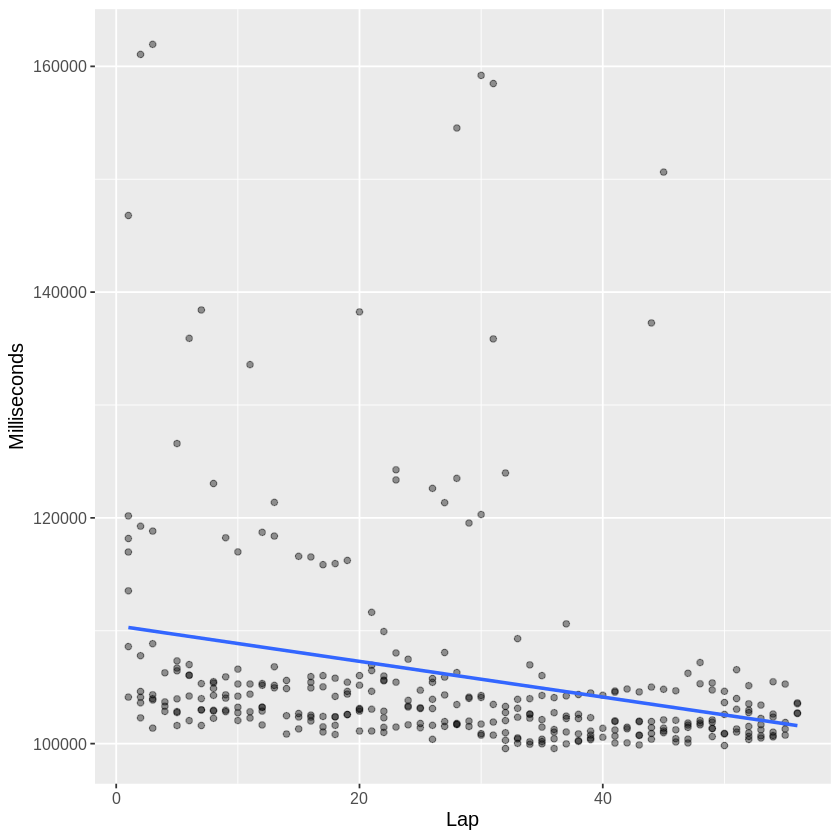

In [23]:
#19. USA, Austin

sp_austin <- per_laps %>%
                filter(raceId %in% austin_race_ID) 

sp_austin_clean <- sp_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_austin_clean
sp_austin_clean_ID <- sp_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_austin_races <- per_laps %>%
                    filter(raceId %in% sp_austin_clean_ID)

formulaone_split <- initial_split(sp_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
943,71
966,71
1027,71
1070,71
986,70
1007,38


`geom_smooth()` using formula 'y ~ x'



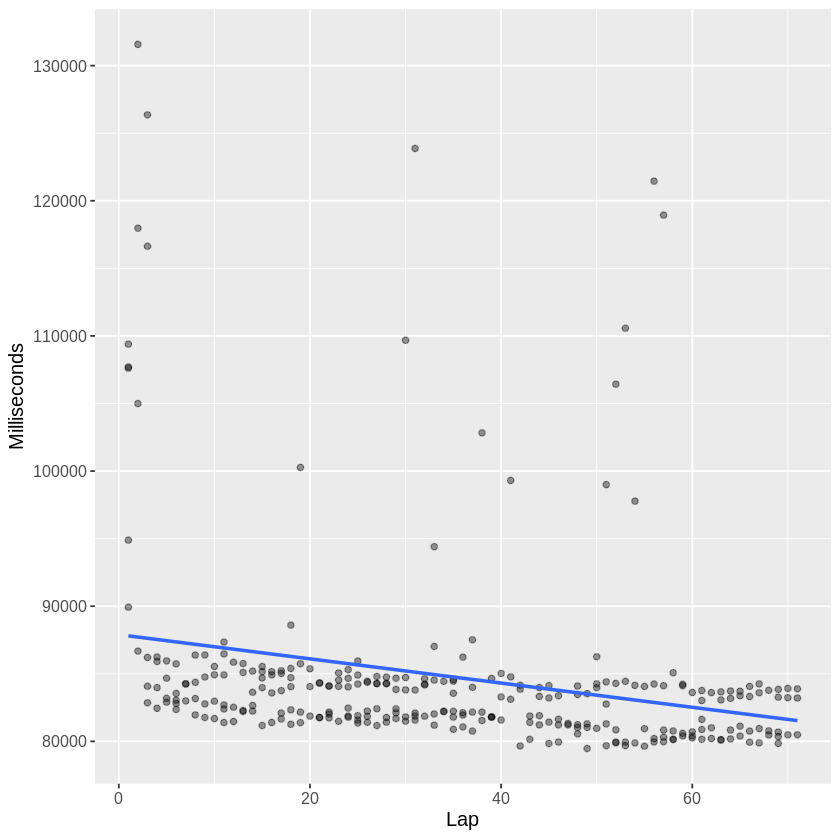

In [24]:
#20. Mexico

sp_mexico <- per_laps %>%
                filter(raceId %in% mexico_race_ID) 

sp_mexico_clean <- sp_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_mexico_clean
sp_mexico_clean_ID <- sp_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_mexico_races <- per_laps %>%
                    filter(raceId %in% sp_mexico_clean_ID)

formulaone_split <- initial_split(sp_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
899,71
967,71
987,71
1029,71
1071,71
859,70
917,70
944,70
1008,70


`geom_smooth()` using formula 'y ~ x'



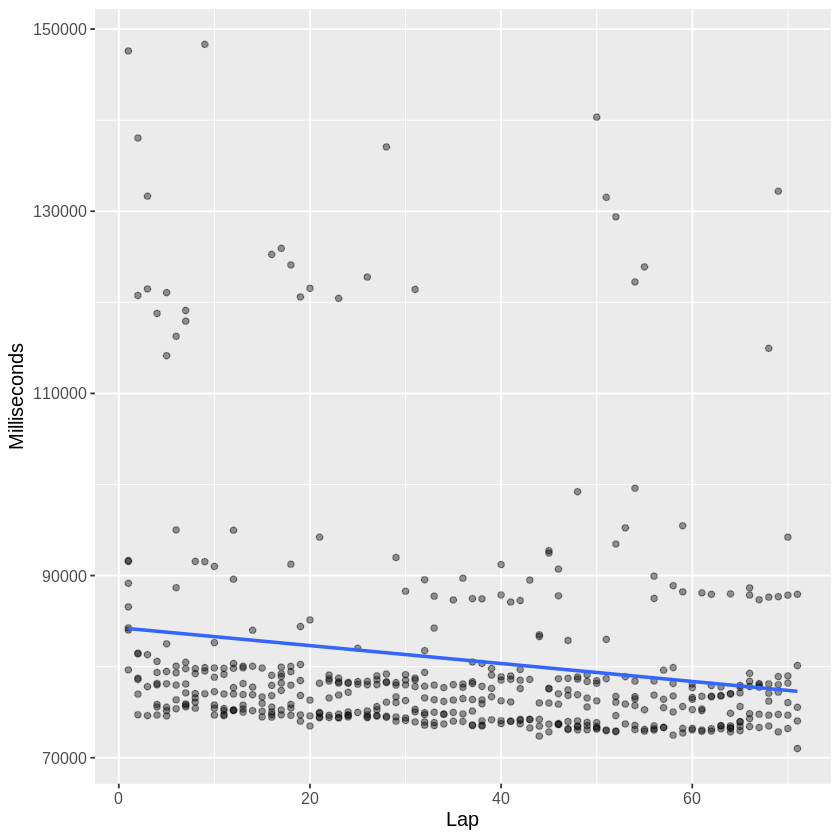

In [25]:
#21. Brazil

sp_brazil <- per_laps %>%
                filter(raceId %in% brazil_race_ID) 

sp_brazil_clean <- sp_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_brazil_clean
sp_brazil_clean_ID <- sp_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_brazil_races <- per_laps %>%
                    filter(raceId %in% sp_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(sp_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
877,55
897,55
918,55
945,55
968,55
988,55
1009,55
858,54
1030,54


`geom_smooth()` using formula 'y ~ x'



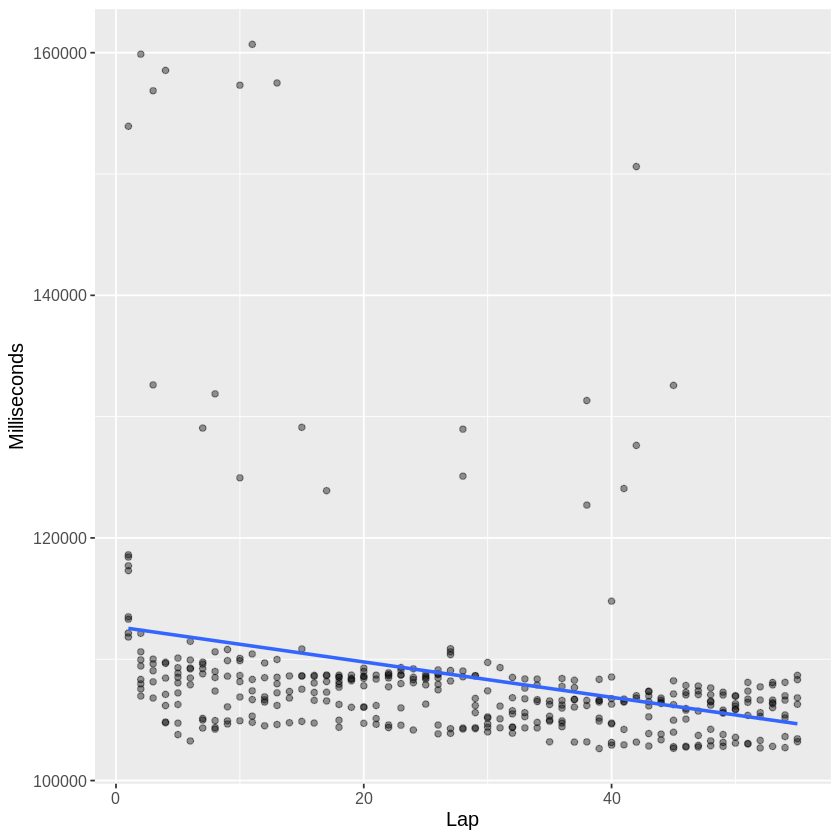

In [26]:
#22. Abu Dhabi

sp_uae <- per_laps %>%
                filter(raceId %in% uae_race_ID) 

sp_uae_clean <- sp_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sp_uae_clean
sp_uae_clean_ID <- sp_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

sp_uae_races <- per_laps %>%
                    filter(raceId %in% sp_uae_clean_ID)

formulaone_split <- initial_split(sp_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

# write_csv(rmse_col, "sp_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,10000.317,1
rmse,standard,8806.506,2
rmse,standard,8645.619,3
rmse,standard,18309.276,4
rmse,standard,7100.988,5
rmse,standard,8279.875,6
rmse,standard,12123.523,7
rmse,standard,20769.463,8
rmse,standard,8360.047,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5763314,96.05523,1.600921,1
5621373,93.68954,1.561492,2
5504652,91.74420,1.529070,3
5545124,92.41873,1.540312,4
5630334,93.83889,1.563982,5
5956193,99.26988,1.654498,6
6476019,107.93366,1.798894,7
5887484,98.12473,1.635412,8
5615788,93.59647,1.559941,9
